In [ ]:
pip install tensorflow==2.15

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstalling keras-3.6.0:
      Successfully uninstalled keras-3.6.0
  Attempting uninstall: tensorb

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git
!pip install autokeras

  Cloning https://github.com/keras-team/keras-tuner.git to /tmp/pip-req-build-0s093hp3
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-0s093hp3
  Resolved https://github.com/keras-team/keras-tuner.git to commit 417e5b5e8df924d428a3c64007f3ed47bd4c7026
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.3 MB)
Using cached ml_dtypes-0.4.1-cp310-cp310-

In [ ]:
import tensorflow as tf
import autokeras as ak
import pandas as pd
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from nltk.tokenize import RegexpTokenizer
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
import os

In [ ]:
os.chdir( "/content/drive/My Drive/PES_MTech_inperson/S3_S4")

### Load the dataset from the disk

In [ ]:
import pandas as pd
df = pd.read_csv('complaints.csv') # We are taking less rows for faster execution
df.head()

,Consumer complaint narrative,Product
0,I have outdated information on my credit repor...,Credit reporting
1,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
2,An account on my credit report has a mistaken ...,Credit reporting
3,This company refuses to provide me verificatio...,Debt collection
4,This complaint is in regards to Square Two Fin...,Debt collection


In [ ]:
df.shape

(179776, 2)

In [ ]:
df['Product'].value_counts()

,count
Product,
Debt collection,43946
Mortgage,34576
Credit reporting,31589
Credit card,18845
Bank account or service,14892
Student loan,12047
Consumer Loan,9486
"Credit reporting, credit repair services, or other personal consumer reports",6118
Payday loan,1750


<Axes: xlabel='Product'>

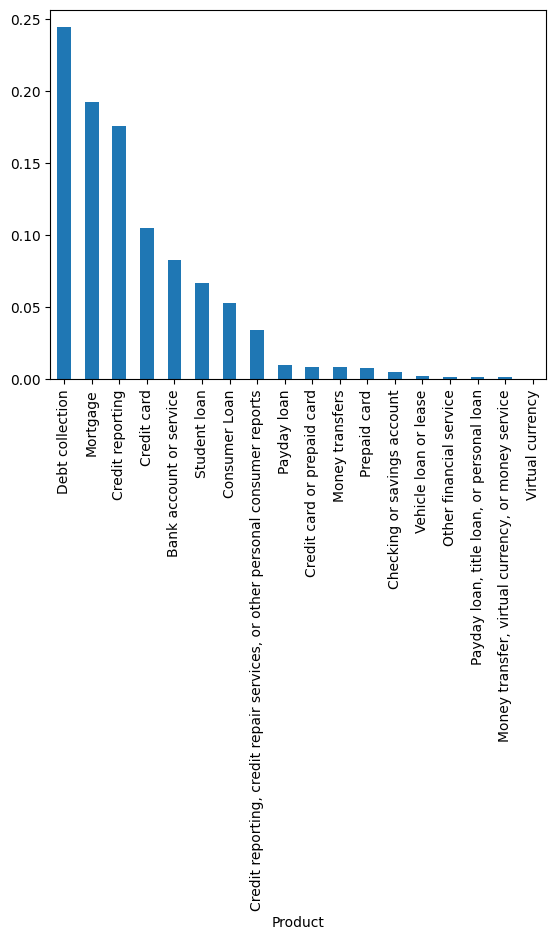

In [ ]:
df['Product'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
stratify_column = 'Product'

In [ ]:
df_prod, _=train_test_split(df, test_size=0.75, stratify=df[stratify_column], random_state=42)

In [ ]:
df.shape

(179776, 2)

In [ ]:
df_prod.shape

(44944, 2)

<Axes: xlabel='Product'>

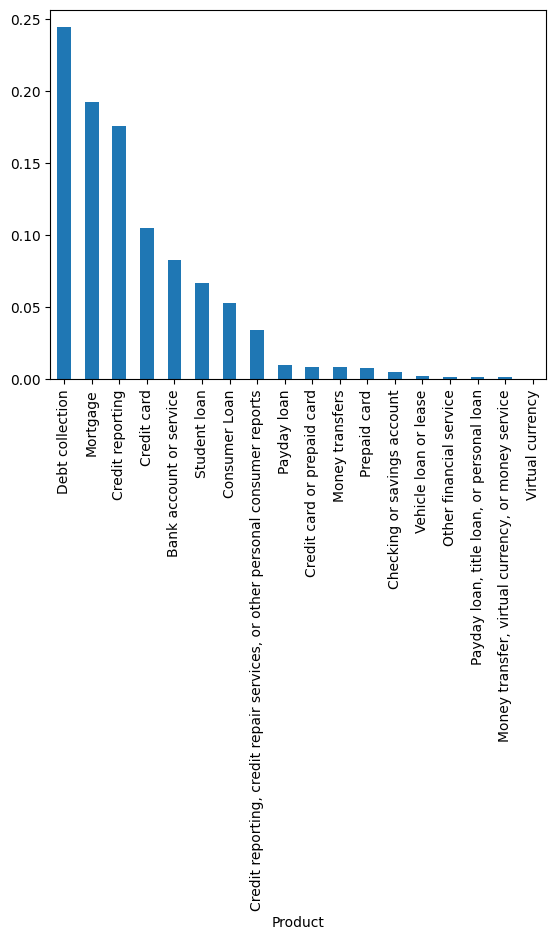

In [ ]:
df_prod['Product'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
threshold=0.05

In [ ]:
values_below_threshold = df_prod['Product'].value_counts(normalize=True)
values_below_threshold = values_below_threshold[df_prod['Product'].value_counts(normalize=True) <=threshold ].index.tolist()

In [ ]:
values_below_threshold

['Credit reporting, credit repair services, or other personal consumer reports',
 'Payday loan',
 'Credit card or prepaid card',
 'Money transfers',
 'Prepaid card',
 'Checking or savings account',
 'Vehicle loan or lease',
 'Other financial service',
 'Payday loan, title loan, or personal loan',
 'Money transfer, virtual currency, or money service',
 'Virtual currency']

In [ ]:
len(values_below_threshold)

11

In [ ]:
df_prod['Product'] = df_prod['Product'].apply(lambda x: 'Other' if x in values_below_threshold else x)

<Axes: xlabel='Product'>

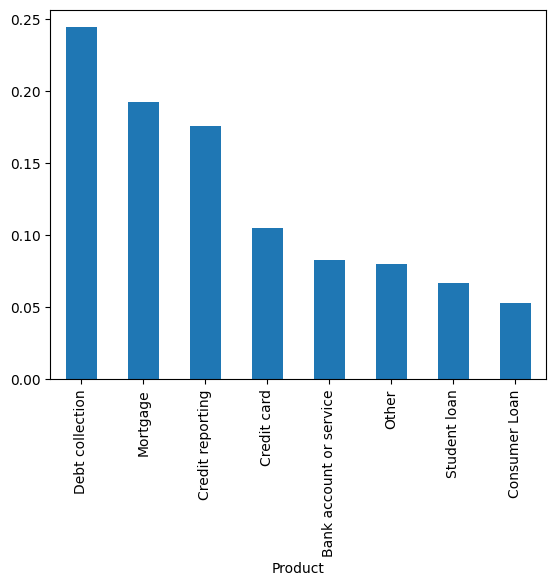

In [ ]:
df_prod['Product'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
df_prod.isnull().sum()

,0
Consumer complaint narrative,0
Product,0


### Tokenizer
Regular expression based tokenizers to consider only alphabetical sequences and ignore numerical sequences.

In [ ]:
def cleanup(text):

    #words = comp.lower().split()
    alphabets_only = re.sub("[^a-zA-Z\s]", "", text) # Remove non-alphabetic characters
    alphabets_only = re.sub("\d+", "", alphabets_only)  # Remove digits explicitly
    alphabets_only = re.sub("\s+", " ", alphabets_only).strip() # Remove extra spaces
    return alphabets_only.lower()

In [ ]:
df_prod['Consumer complaint narrative']=df_prod['Consumer complaint narrative'].apply(cleanup)

### Vocabulary
Extracing all the unique words from the dataset

In [ ]:
def complaint_to_words(text) -> list:
    return text.split()

In [ ]:
all_words = list()
for comp in df_prod['Consumer complaint narrative']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [ ]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 47743


In [ ]:
print('Complaint\n', df_prod['Consumer complaint narrative'].iloc[10], '\n')
print('Tokens\n', complaint_to_words(df_prod['Consumer complaint narrative'].iloc[10]))

Complaint
 my credit has been in consumer affairs department with equifax since they claim they protecting my identity but this not only effecting me but it is effecting my family i cant purchase a home because there are accounts on my credit from identity theft i have proof of the accounts previous being deleted also it is effecting me with irs because they have businesses reporting income that i have no clue who they are from and it is spilling over from my credit to irs 

Tokens
 ['my', 'credit', 'has', 'been', 'in', 'consumer', 'affairs', 'department', 'with', 'equifax', 'since', 'they', 'claim', 'they', 'protecting', 'my', 'identity', 'but', 'this', 'not', 'only', 'effecting', 'me', 'but', 'it', 'is', 'effecting', 'my', 'family', 'i', 'cant', 'purchase', 'a', 'home', 'because', 'there', 'are', 'accounts', 'on', 'my', 'credit', 'from', 'identity', 'theft', 'i', 'have', 'proof', 'of', 'the', 'accounts', 'previous', 'being', 'deleted', 'also', 'it', 'is', 'effecting', 'me', 'with', '

Conventional ML models with TF_IDF vectorization

In [ ]:
df_prod.sample(10)

,Consumer complaint narrative,Product
173011,i received a letter from xxxx xxxx xxxx that r...,Debt collection
159687,servicer is not counting pslf eligible payment...,Student loan
39698,xxxx xxxx wednesday xxxx transcripot of call f...,Debt collection
36542,equifax credit needed to take off xxxx collect...,Credit reporting
57378,the company portfolio recovery associates llc ...,Debt collection
71595,went to pay my citi credit card teller said th...,Credit card
139793,xxxx xxxx from new era asset management has ca...,Debt collection
151947,applied for income based repayment plan with n...,Student loan
56603,hello i am writing a complaint due to your fal...,Other
143770,on xxxx xxxx xxxx i went into the pnc branch i...,Bank account or service


In [ ]:
df_train=df_prod.sample(frac=0.9,random_state=50)
df_test=df_prod.drop(df_train.index)

In [ ]:
embeddings_index = {}
f = open('glove6B300d.txt') # 100, 500
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

#### Taking average of all word embeddings in a sentence to generate the sentence representation.

In [ ]:
def encode_text(text, embedding_dict, embedding_dim=300):
    words = text.split()
    word_vectors = [embedding_dict[word] for word in words if word in embedding_dict]

    if len(word_vectors) == 0:
        return np.zeros(embedding_dim)  # Return a zero vector if no word is found

    return np.mean(word_vectors, axis=0)

In [ ]:
df_prod['Glove_Encoding'] = df_prod['Consumer complaint narrative'].apply(lambda x: encode_text(x, embeddings_index))

In [ ]:
encoded_df = pd.DataFrame(df_prod['Glove_Encoding'].tolist(), index=df_prod.index)
encoded_df['Product'] = df_prod['Product'].values

In [ ]:
encoded_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Product
115875,-0.040467,0.024386,-0.072228,-0.099204,0.055160,-0.015816,-0.064211,-0.036354,-0.000410,-1.439862,...,-0.107777,0.051863,-0.001384,0.191424,0.190855,0.101236,-0.149234,-0.100145,0.030710,Consumer Loan
6039,-0.166500,0.054138,-0.110659,-0.127468,-0.017600,-0.005707,-0.037753,-0.019575,0.038029,-1.642879,...,-0.204204,0.050962,0.025660,0.149978,0.050725,0.060861,-0.203374,-0.108802,0.061539,Other
97807,-0.147072,0.075552,-0.044038,-0.105551,0.128386,0.113458,-0.063526,-0.002270,0.074323,-1.497201,...,-0.173842,0.090623,0.146119,0.133275,0.056013,0.046811,-0.192632,-0.043849,-0.015155,Credit card
98515,-0.026854,0.026941,-0.069892,-0.095332,-0.000177,-0.031755,-0.061283,-0.096797,0.060617,-1.459563,...,-0.168099,0.046994,-0.000766,0.128711,0.107952,0.066284,-0.142725,-0.070363,-0.066482,Credit reporting
49898,-0.123289,0.087326,-0.093318,-0.076037,0.002132,0.022733,0.036903,-0.025001,0.051578,-1.460880,...,-0.153267,0.031450,-0.017228,0.197450,-0.004918,0.085273,-0.209177,-0.079025,0.034806,Student loan
149786,-0.130910,0.090561,-0.084593,-0.102996,-0.090327,-0.016940,-0.049335,-0.038709,0.046577,-1.625728,...,-0.198285,-0.046865,0.050641,0.172514,0.175206,0.084081,-0.122742,-0.123402,-0.082418,Credit reporting
106340,-0.086787,0.140652,-0.082349,-0.084678,-0.071618,-0.015146,0.060225,0.077970,0.046418,-1.630024,...,-0.232519,0.039933,-0.067247,0.074024,0.142822,0.040428,-0.297791,-0.063222,-0.031156,Debt collection
148530,-0.142248,0.070311,0.014063,-0.059071,-0.039649,0.061222,-0.022654,-0.013447,0.027420,-1.390869,...,-0.170916,-0.009679,-0.005869,0.192296,0.084869,0.073570,-0.166186,-0.066081,-0.032866,Debt collection
134279,-0.084447,0.081363,-0.047326,-0.117674,0.023755,-0.022164,0.025544,-0.053779,-0.016317,-1.444929,...,-0.156595,-0.007929,-0.014954,0.202671,0.065097,0.119044,-0.141328,-0.111307,0.060174,Mortgage
221,-0.091796,0.054923,-0.015446,-0.124636,-0.082728,0.022685,-0.018740,0.003267,0.005345,-1.545861,...,-0.145008,0.037885,-0.034374,0.151788,0.120171,0.075922,-0.188380,-0.071520,-0.033055,Debt collection


#### Converting categrical labels to numerical format and further one hot encoding on the numerical labels.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(encoded_df['Product'])
encoded_df['Product_enc'] = le.transform(encoded_df['Product'])

In [ ]:
df_nn=encoded_df.drop(['Product'],axis=1)

In [ ]:
df_nn.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Product_enc
37607,-0.145615,-0.005511,-0.125930,-0.092531,-0.063811,0.009620,-0.079904,-0.086077,0.025461,-1.567994,...,-0.120946,0.066863,-0.018194,0.132877,0.081028,0.123317,-0.148521,-0.087537,-0.050321,4
58401,-0.047922,-0.033410,-0.053114,-0.046251,0.166125,0.144507,-0.061980,-0.030071,0.066219,-1.216841,...,-0.080526,0.050000,0.169067,0.179471,0.111747,0.135961,-0.137929,0.110804,0.047119,6
129462,-0.103897,0.046816,-0.150493,-0.104226,0.081918,0.091761,-0.055271,-0.037244,0.177264,-1.434781,...,-0.260908,0.022747,0.004552,0.156322,-0.137187,0.063215,-0.208899,0.016771,0.033923,3
63067,-0.133210,0.090312,-0.068997,-0.111949,-0.048206,0.028787,0.011999,0.025984,0.028084,-1.583574,...,-0.215988,-0.000706,0.023901,0.181966,0.058792,0.047651,-0.205993,-0.051983,-0.022843,5
179399,-0.058836,0.135043,-0.146384,-0.160671,-0.073391,-0.100232,0.049108,0.035461,0.038789,-1.676799,...,-0.229921,0.071815,-0.018318,0.159614,0.035816,0.073760,-0.185315,-0.097666,0.016594,4
100333,-0.111850,0.067603,-0.102147,-0.065251,-0.000817,-0.074493,0.118456,-0.056139,-0.043618,-1.499473,...,-0.161312,0.122233,-0.071188,0.206481,0.110879,0.140249,-0.244266,-0.191135,0.025568,7
68579,-0.119437,0.121235,-0.146131,-0.069340,-0.034090,0.007275,0.017621,0.025827,0.073732,-1.705120,...,-0.249027,0.094379,-0.000947,0.202557,0.011313,0.053071,-0.271347,-0.082682,0.025946,5
43709,-0.021921,0.034879,-0.092232,-0.078186,-0.081364,-0.095923,-0.044200,0.051431,0.091661,-1.593121,...,-0.156276,0.139449,-0.026555,0.225956,0.129790,0.027472,-0.207505,-0.159470,-0.022191,5
20342,-0.062021,-0.011935,-0.006544,-0.081291,0.054629,0.153305,-0.094474,0.062050,0.032578,-1.453147,...,-0.128268,0.085916,0.059477,0.049229,0.064390,0.020883,-0.105592,-0.089996,-0.050663,3
1743,-0.072031,0.055086,-0.061852,-0.043613,0.063511,0.043436,-0.022340,-0.032080,0.005495,-1.383158,...,-0.157960,0.074796,0.017765,0.184299,0.068065,0.107273,-0.173422,-0.088495,0.034796,5


In [ ]:
NUM_CLS=df_nn['Product_enc'].nunique()
NUM_CLS

8

In [ ]:
y=df_nn['Product_enc']
x=df_nn.drop(['Product_enc'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
X_train = preprocessing.normalize(X_train)

In [ ]:
X_test = preprocessing.normalize(X_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35955, 300)
(8989, 300)
(35955,)
(8989,)


In [ ]:
input_node = ak.Input(name="avg_encoding" )
hidden_nodes=ak.DenseBlock( )(input_node)
output_node = ak.ClassificationHead(loss='binary_crossentropy',metrics=['recall','accuracy','auc'])(hidden_nodes)
# Create the AutoModel
clf = ak.AutoModel(
    inputs = input_node,
    outputs = output_node,
    overwrite = True,
    max_trials = 50)


In [ ]:
clf.fit(X_train, y_train, epochs=5 )

Trial 50 Complete [00h 00m 25s]
val_loss: 0.7815184593200684

Best val_loss So Far: 0.7301069498062134
Total elapsed time: 00h 19m 24s
Epoch 1/5
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6428 - auc: 0.9030 - loss: 1.1110 - recall: 0.4671
Epoch 2/5
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7473 - auc: 0.9554 - loss: 0.7725 - recall: 0.6617
Epoch 3/5
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7749 - auc: 0.9647 - loss: 0.6866 - recall: 0.7019
Epoch 4/5
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7990 - auc: 0.9724 - loss: 0.6072 - recall: 0.7357
Epoch 5/5
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8259 - auc: 0.9790 - loss: 0.5301 - recall: 0.7706


In [ ]:
print(clf.evaluate(X_train, y_train))

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 1 variables whereas the saved optimizer has 21 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1124/1124 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8460 - auc: 0.9838 - loss: 0.4697 - recall: 0.7942
[0.5178899765014648, 0.7806702852249146, 0.830899715423584, 0.9792594909667969]


In [ ]:
print(clf.evaluate(X_test, y_test))

281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7764 - auc: 0.9603 - loss: 0.7129 - recall: 0.7228
[0.7269529700279236, 0.7173211574554443, 0.7700523138046265, 0.9590515494346619]


In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
model = clf.export_model()


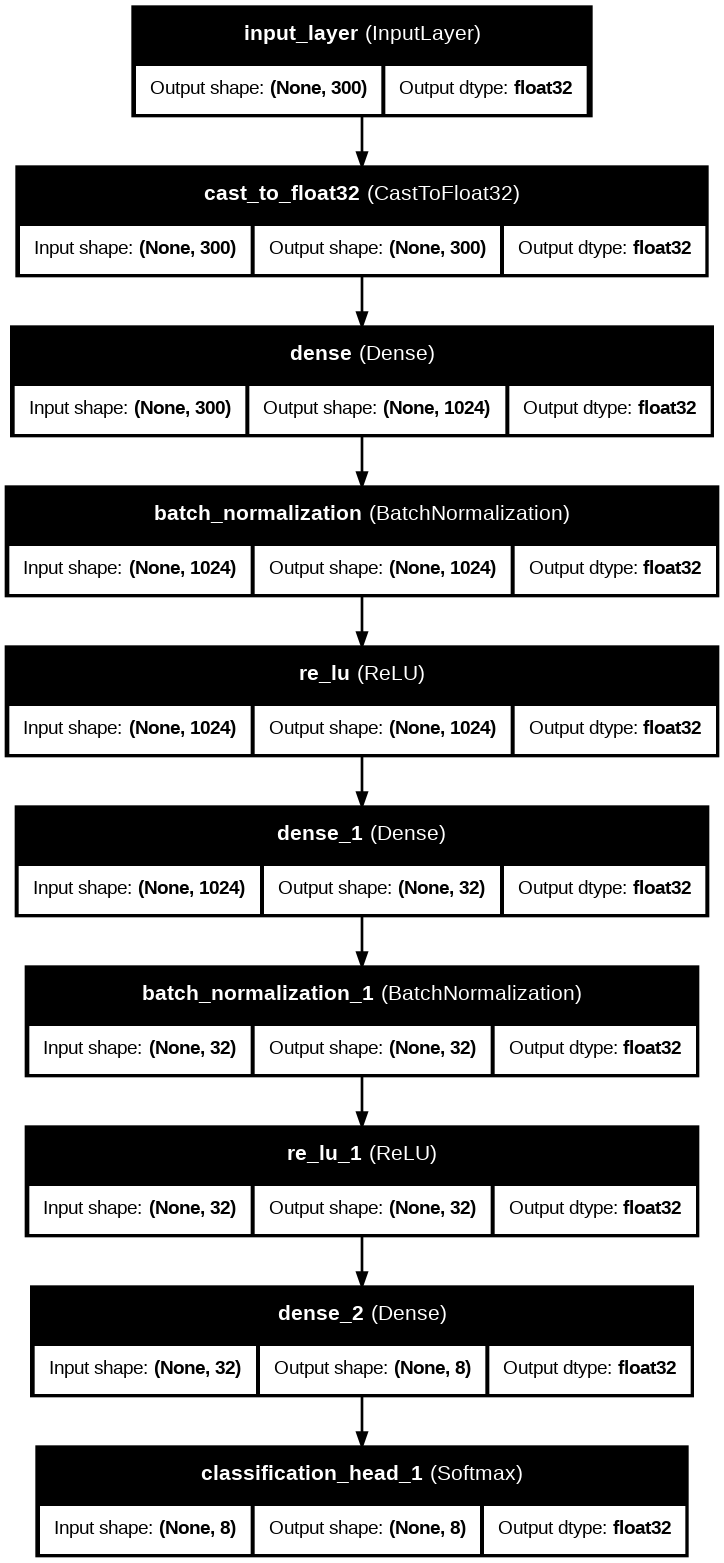

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
)

In [ ]:
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        print(f"Layer Name: {layer.name}, Number of Neurons: {layer.units}")

Layer Name: dense, Number of Neurons: 1024
Layer Name: dense_1, Number of Neurons: 32
Layer Name: dense_2, Number of Neurons: 8


In [ ]:
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dropout):
        print(f"Layer: {layer.name}, Dropout Rate: {layer.rate}")

In [ ]:
# Retrieve the optimizer
optimizer = model.optimizer
optimizer_name = optimizer.__class__.__name__


In [ ]:
learning_rate = optimizer.learning_rate
if isinstance(learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
    initial_learning_rate = learning_rate.initial_learning_rate.numpy()
else:
    initial_learning_rate = learning_rate.numpy()

In [ ]:
print(f"Optimizer: {optimizer_name}")
print(f"Learning Rate: {initial_learning_rate}")

Optimizer: AdamW
Learning Rate: 0.0010000000474974513
